# Diabetes Classification

### Machine Learning in Health
Diabetes is a condition that impairs the body's ability to process blood glucose, otherwise known
as blood sugar. In the United States, the estimated number of people over 18 years of age with
diagnosed and undiagnosed diabetes is 30.2 million. The figure represents between 27.9 and
32.7 percent of the population.
Without ongoing, careful management, diabetes can lead to a buildup of sugar in the blood,
which can increase the risk of dangerous complications, including stroke and heart disease.
Different kinds of diabetes can occur, and managing the condition depends on the type. Not all
forms of diabetes stem from a person being overweight or leading an inactive lifestyle. In fact,
some are present from childhood.

### Challenge
In this problem you are given a Diabetes Data set consisting of the following features - ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'] and your task is to predict whether a person is suffering from diabetes or not (Binary Classification)

### Tasks
1) Plot a bar graph showing number of classes and no of examples in each class.                      
2) Classification Task, classify a person as a 0 or 1 (Diabetic or Not) using K-Nearest Neighbors      classifier.                                                                                           
Download the training data set and submit your predictions as .csv for the Test cases given below.

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [56]:
x_train = pd.read_csv('../Diabetes Classification Project/Diabetes_Xtrain.csv')
y_train = pd.read_csv('../Diabetes Classification Project/Diabetes_Ytrain.csv')
x_test = pd.read_csv('../Diabetes Classification Project/Diabetes_Xtest.csv')

In [3]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,168,88,42,321,38.2,0.787,40
1,8,110,76,0,0,27.8,0.237,58
2,7,147,76,0,0,39.4,0.257,43
3,2,100,66,20,90,32.9,0.867,28
4,4,129,86,20,270,35.1,0.231,23
...,...,...,...,...,...,...,...,...
571,2,111,60,0,0,26.2,0.343,23
572,7,187,68,39,304,37.7,0.254,41
573,2,122,60,18,106,29.8,0.717,22
574,4,154,72,29,126,31.3,0.338,37


In [4]:
y_train

,Outcome
0,1
1,0
2,1
3,1
4,0
...,...
571,0
572,1
573,0
574,0


In [5]:
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,180,90,26,90,36.5,0.314,35
1,2,93,64,32,160,38.0,0.674,23
2,2,114,68,22,0,28.7,0.092,25
3,13,76,60,0,0,32.8,0.180,41
4,1,80,74,11,60,30.0,0.527,22
...,...,...,...,...,...,...,...,...
187,10,108,66,0,0,32.4,0.272,42
188,3,130,64,0,0,23.1,0.314,22
189,0,162,76,36,0,49.6,0.364,26
190,12,84,72,31,0,29.7,0.297,46


In [6]:
x = x_train.values
y=y_train.values
x_test = x_test.values

In [7]:
x

array([[  7.   , 168.   ,  88.   , ...,  38.2  ,   0.787,  40.   ],
       [  8.   , 110.   ,  76.   , ...,  27.8  ,   0.237,  58.   ],
       [  7.   , 147.   ,  76.   , ...,  39.4  ,   0.257,  43.   ],
       ...,
       [  2.   , 122.   ,  60.   , ...,  29.8  ,   0.717,  22.   ],
       [  4.   , 154.   ,  72.   , ...,  31.3  ,   0.338,  37.   ],
       [  1.   ,  88.   ,  78.   , ...,  32.   ,   0.365,  29.   ]])

In [8]:
y

array([[1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
    

In [9]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(X,Y,queryPoint,k=5):
    
    vals = []
    m = X.shape[0]
    
    for i in range(m):
        d = dist(queryPoint,X[i])
        vals.append((d,Y[i]))
        
    
    vals = sorted(vals)
    # Nearest/First K points
    vals = vals[:k]
    
    vals = np.array(vals)
    
    #print(vals)
    
    new_vals = np.unique(vals[:,1],return_counts=True)
    #print(new_vals)
    
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    
    return pred

In [10]:
pred = knn(x,y,x_test[1])

print(int(pred))

0


In [11]:
diabetic = x_train.loc[(y==0)]
diabetic

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
1,8,110,76,0,0,27.8,0.237,58
4,4,129,86,20,270,35.1,0.231,23
6,4,110,66,0,0,31.9,0.471,29
7,1,111,86,19,0,30.1,0.143,23
9,1,71,62,0,0,21.8,0.416,26
...,...,...,...,...,...,...,...,...
570,7,179,95,31,0,34.2,0.164,60
571,2,111,60,0,0,26.2,0.343,23
573,2,122,60,18,106,29.8,0.717,22
574,4,154,72,29,126,31.3,0.338,37


In [12]:
non_diabetic = x_train.loc[(y==1)]
non_diabetic

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,168,88,42,321,38.2,0.787,40
2,7,147,76,0,0,39.4,0.257,43
3,2,100,66,20,90,32.9,0.867,28
5,7,100,0,0,0,30.0,0.484,32
8,3,169,74,19,125,29.9,0.268,31
...,...,...,...,...,...,...,...,...
556,2,146,0,0,0,27.5,0.240,28
560,10,129,62,36,0,41.2,0.441,38
563,3,141,0,0,0,30.0,0.761,27
567,12,151,70,40,271,41.8,0.742,38


(array([52., 87., 64., 30., 40., 25., 23., 14., 13.,  6., 10.,  4.,  4.,
         3.,  0.,  0.,  0.,  0.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18.]),
 <a list of 18 Patch objects>)

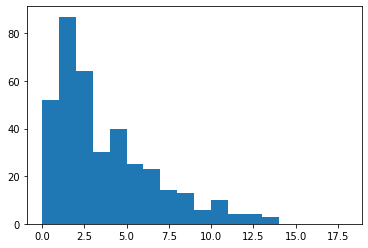

In [48]:
p=diabetic["Pregnancies"].values
fig,ax = plt.subplots(1,1)
q=np.linspace(0,18,19)
ax.hist(p , bins=q)

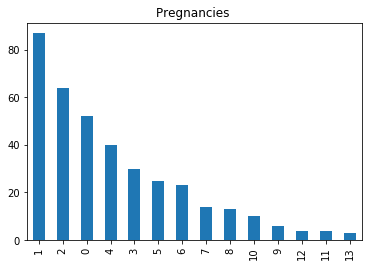

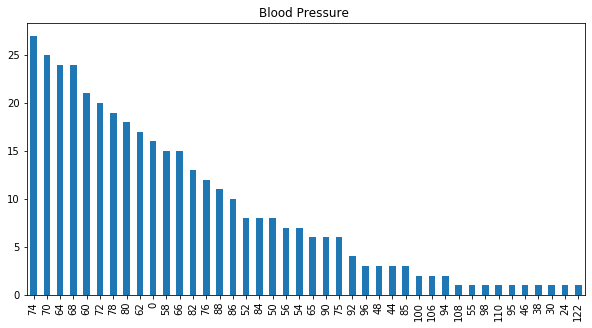

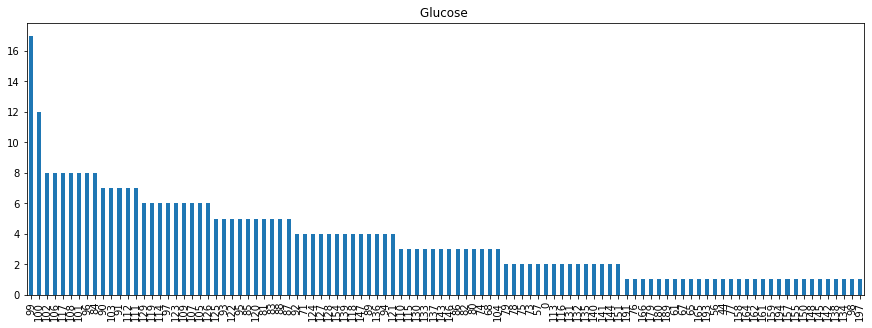

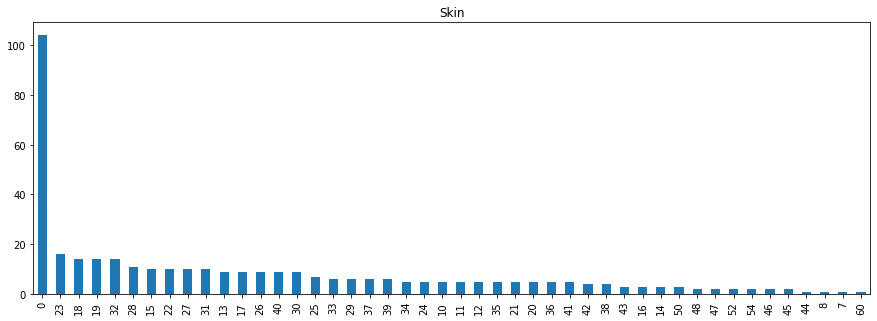

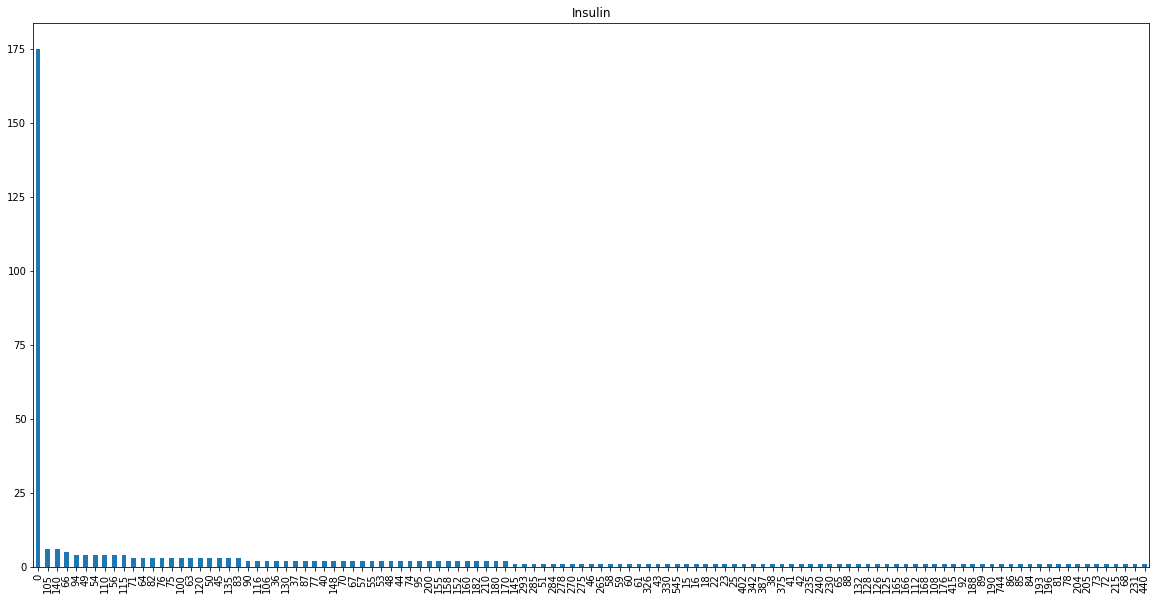

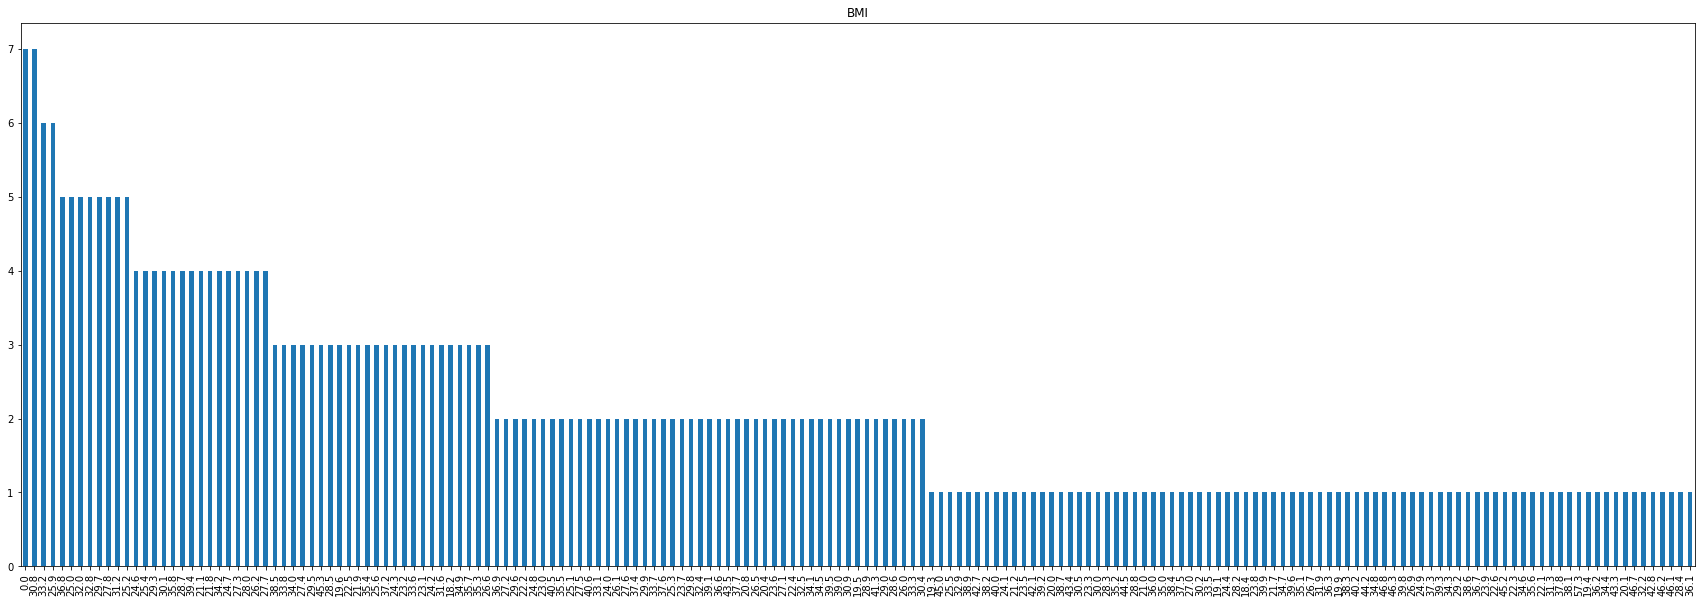

In [38]:
diabetic['Pregnancies'].value_counts().plot(kind='bar',title="Pregnancies ")
plt.show()
diabetic['BloodPressure'].value_counts().plot(kind='bar',title="Blood Pressure ",figsize=(10,5))
plt.show()
diabetic['Glucose'].value_counts().plot(kind='bar',title="Glucose ",figsize=(15,5))
plt.show()
diabetic['SkinThickness'].value_counts().plot(kind='bar',title="Skin",figsize=(15,5))
plt.show()
diabetic['Insulin'].value_counts().plot(kind='bar',title="Insulin",figsize=(20,10))
plt.show()
diabetic['BMI'].value_counts().plot(kind='bar',title="BMI",figsize=(30,10))
plt.show()

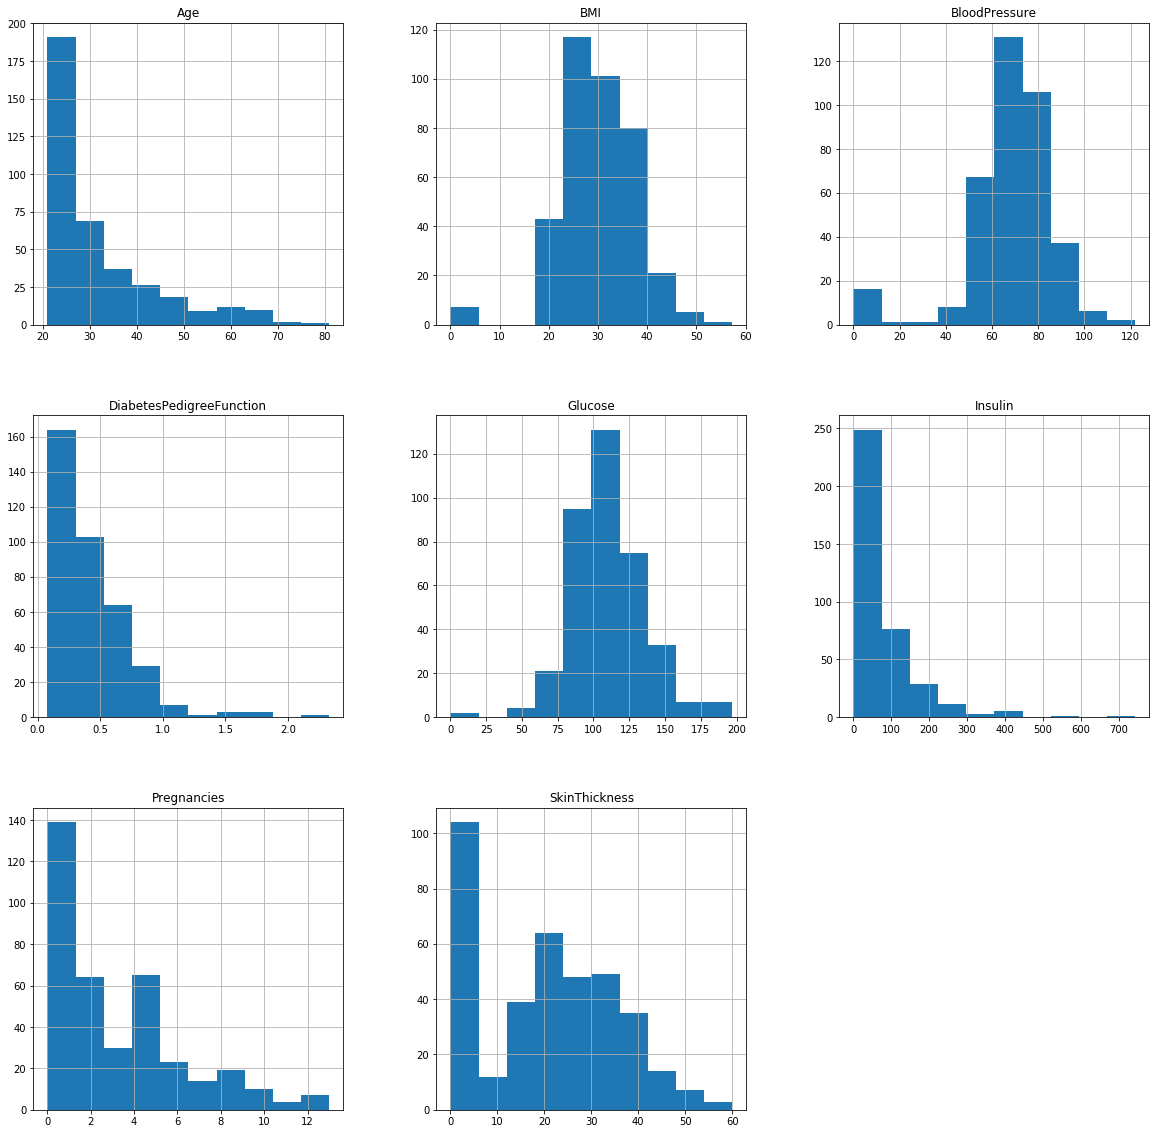

In [49]:
plo = diabetic.hist(figsize = (20,20))

KeyError: 'Outcome'

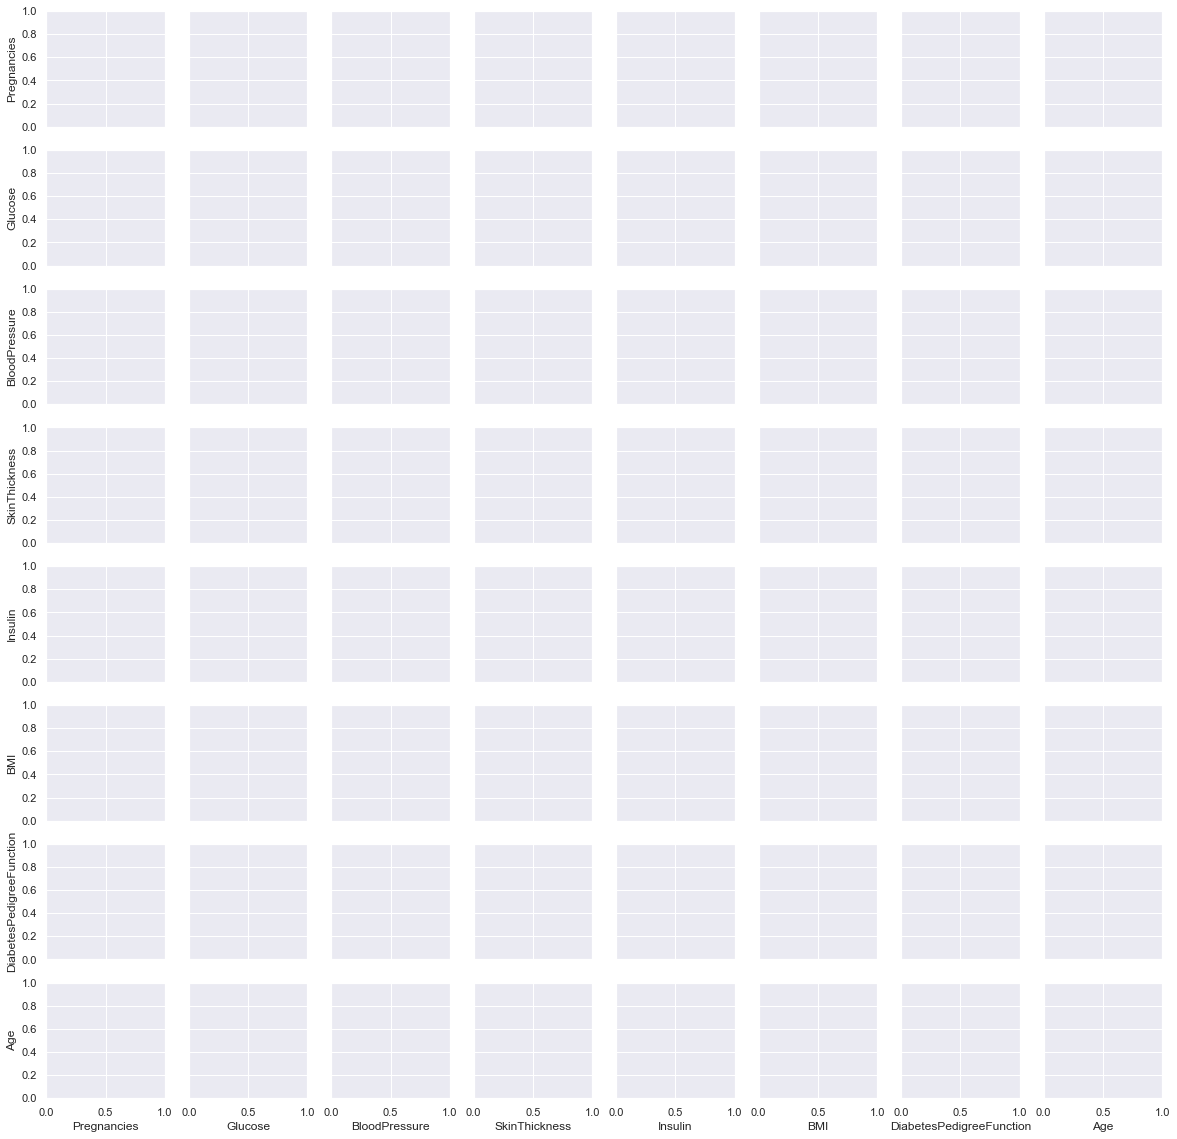

<BarContainer object of 2 artists>

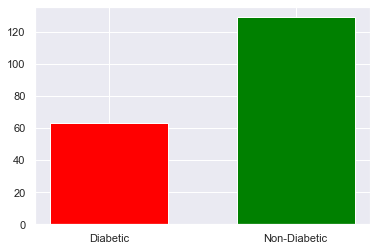

In [57]:
X=x_test.values
Y_pred=[]
for i in range(X.shape[0]):
    Y_pred.append(knn(x,y,X[i]))
tick_label=['Diabetic','Non-Diabetic']
left=[2,5]
data1,data2=np.unique(Y_pred,return_counts=True)
final=dict(zip(data1,data2))
height=[final[1],final[0]]
plt.bar(left,height,tick_label=tick_label,width=1.9,color=['red','green'])

In [58]:
Y_final=[]
Y_pred=np.array(Y_pred)
for i in range(Y_pred.shape[0]):
    if(Y_pred[i]==0):
        Y_final.append('Non-Diabetic')
    else:
        Y_final.append('Diabetic')

In [60]:
x_test_y=pd.DataFrame(Y_final,columns=['Outcome'])
x_test.join(x_test_y)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,180,90,26,90,36.5,0.314,35,Diabetic
1,2,93,64,32,160,38.0,0.674,23,Non-Diabetic
2,2,114,68,22,0,28.7,0.092,25,Non-Diabetic
3,13,76,60,0,0,32.8,0.180,41,Non-Diabetic
4,1,80,74,11,60,30.0,0.527,22,Non-Diabetic
...,...,...,...,...,...,...,...,...,...
187,10,108,66,0,0,32.4,0.272,42,Diabetic
188,3,130,64,0,0,23.1,0.314,22,Non-Diabetic
189,0,162,76,36,0,49.6,0.364,26,Diabetic
190,12,84,72,31,0,29.7,0.297,46,Diabetic


In [61]:
df_test_y.head(20)

,Outcome
0,Diabetic
1,Non-Diabetic
2,Non-Diabetic
3,Non-Diabetic
4,Non-Diabetic
5,Diabetic
6,Diabetic
7,Diabetic
8,Non-Diabetic
9,Diabetic


In [62]:
df_test_y.to_csv('../Diabetes Classification Project/my_Prediction.csv')